In [10]:
%matplotlib inline

In [11]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

[45 57 61 11 55 15  5 48 19  8  9 54  7 39 33 50 39 34 53  5 59 30 25 59
 35]
[[1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0]]


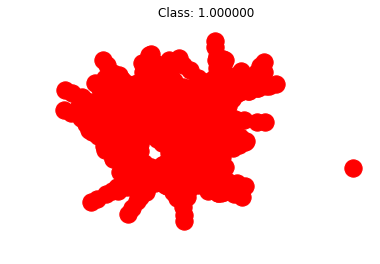

In [12]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

training_idx = np.random.randint(4,64,25)
print(training_idx)
trainset=[]
labels=[]
#for filename in os.listdir(dir):
for idx in training_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    
    trainset.append(g2)
    labels.append(label_list2[0])





for i in labels:
    i[0] = int(i[0])

print(labels)
# A dataset with 80 samples, each graph is
# of size [10, 20]
#dataset = MiniGCDataset(80, 10, 20)
#print(dataset[0])
graph = trainset[1]
label=labels[0][0]

fig, ax = plt.subplots()
nx.draw(graph.to_networkx(), ax=ax)
ax.set_title('Class: {:f}'.format(label))
plt.show()

### Apply random shuffle to training set

In [13]:
##apply random shuffle on the trainset    
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])
print(trainset_shuffled)
print(labels_shuffled)

[DGLGraph(num_nodes=71, num_edges=228,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=118, num_edges=394,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=263, num_edges=882,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=747, num_edges=2516,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=1092, num_edges=3612,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=904, num_edges=3030,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=448, num_edges=1504,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=725, num_edges=2426,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=855, num_edges=2834,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=85, num_edges=278,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=435, num_edges=1460,
         ndata_schemes={

In [14]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [15]:
import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

Readout and classification
--------------------------
For this demonstration, consider initial node features to be their degrees.
After two rounds of graph convolution, perform a graph readout by averaging
over all node features for each graph in the batch.

\begin{align}h_g=\frac{1}{|\mathcal{V}|}\sum_{v\in\mathcal{V}}h_{v}\end{align}

In DGL, :func:`dgl.mean_nodes` handles this task for a batch of
graphs with variable size. You then feed the graph representations into a
classifier with one linear layer to obtain pre-softmax logits.



In [16]:
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

Setup and training
------------------
Create a synthetic dataset of $400$ graphs with $10$ ~
$20$ nodes. $320$ graphs constitute a training set and
$80$ graphs constitute a test set.



In [17]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Create training and test sets.
# trainset = MiniGCDataset(320, 10, 20)
# testset = MiniGCDataset(80, 10, 20)
print(trainset)

[DGLGraph(num_nodes=591, num_edges=1988,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=855, num_edges=2834,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=747, num_edges=2516,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=1092, num_edges=3612,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=799, num_edges=2692,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=1154, num_edges=3870,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=149, num_edges=492,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=192, num_edges=642,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=721, num_edges=2428,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=1054, num_edges=3486,
         ndata_schemes={}
         edata_schemes={}), DGLGraph(num_nodes=201, num_edges=668,
         ndata_sche

In [18]:
# Use PyTorch's DataLoader and the collate function
# defined before.
data_loader = DataLoader(trainset, batch_size=2, shuffle=True,
                         collate_fn=collate)
print(data_loader)
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, 2)
#model.cuda()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled)

epoch_losses = []
for epoch in range(80):
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,2,dtype=torch.float64)
        prediction[0] = model(bg)
        
        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)

Epoch 0, loss 0.8273
Epoch 1, loss 0.7496
Epoch 2, loss 0.7236
Epoch 3, loss 0.7146
Epoch 4, loss 0.7090
Epoch 5, loss 0.7050
Epoch 6, loss 0.7026
Epoch 7, loss 0.6997
Epoch 8, loss 0.6964
Epoch 9, loss 0.6938
Epoch 10, loss 0.6909
Epoch 11, loss 0.6880
Epoch 12, loss 0.6852
Epoch 13, loss 0.6845
Epoch 14, loss 0.6779
Epoch 15, loss 0.6753
Epoch 16, loss 0.6706
Epoch 17, loss 0.6638
Epoch 18, loss 0.6561
Epoch 19, loss 0.6442
Epoch 20, loss 0.6281
Epoch 21, loss 0.6105
Epoch 22, loss 0.5890
Epoch 23, loss 0.5679
Epoch 24, loss 0.5341
Epoch 25, loss 0.4936
Epoch 26, loss 0.4463
Epoch 27, loss 0.3930
Epoch 28, loss 0.3371
Epoch 29, loss 0.2806
Epoch 30, loss 0.2305
Epoch 31, loss 0.1888
Epoch 32, loss 0.1547
Epoch 33, loss 0.1278
Epoch 34, loss 0.1063
Epoch 35, loss 0.0892
Epoch 36, loss 0.0753
Epoch 37, loss 0.0642
Epoch 38, loss 0.0554
Epoch 39, loss 0.0480
Epoch 40, loss 0.0420
Epoch 41, loss 0.0370
Epoch 42, loss 0.0328
Epoch 43, loss 0.0293
Epoch 44, loss 0.0263
Epoch 45, loss 0.023

The learning curve of a run is presented below.



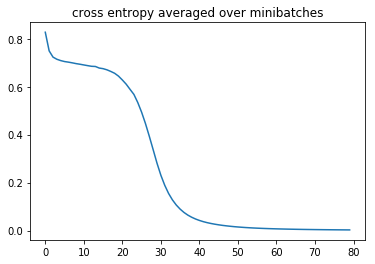

In [19]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

The trained model is evaluated on the test set created. To deploy
the tutorial, restrict the running time to get a higher
accuracy ($80$ % ~ $90$ %) than the ones printed below.



In [20]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([2, 256])

### Get Testset data

In [21]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx=[]
for i in range(4,65):
    if i not in training_idx:
        testing_idx.append(i)

print(testing_idx)
print(training_idx)

[4, 6, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 36, 37, 38, 40, 41, 42, 43, 44, 46, 47, 49, 51, 52, 56, 58, 60, 62, 63, 64]
[45 57 61 11 55 15  5 48 19  8  9 54  7 39 33 50 39 34 53  5 59 30 25 59
 35]


In [22]:
for idx in testing_idx:
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(idx)+"bit"+j+'.csv'
        filename2 = "cla_"+str(idx)+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    
    testset.append(g2)
    test_labels.append(label_list2[0])


for i in test_labels:
    i[0] = int(i[0])

print(test_labels)

[[1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0]]


In [23]:
##apply random shuffle on the testset    
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

In [24]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1)
probs_Y = torch.softmax(model(test_bg), 1)


sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 100.0000%
Accuracy of argmax predictions on the test set: 100.000000%
tensor([0.0026, 0.9974], grad_fn=<SelectBackward>) tensor([1.])
tensor([0.0024, 0.9976], grad_fn=<SelectBackward>) tensor([1.])
tensor([0.9983, 0.0017], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.9972, 0.0028], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.0029, 0.9971], grad_fn=<SelectBackward>) tensor([1.])
tensor([0.0023, 0.9977], grad_fn=<SelectBackward>) tensor([1.])
tensor([0.0028, 0.9972], grad_fn=<SelectBackward>) tensor([1.])
tensor([9.9948e-01, 5.2152e-04], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.9989, 0.0011], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.9989, 0.0011], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.0028, 0.9972], grad_fn=<SelectBackward>) tensor([1.])
tensor([9.9947e-01, 5.2737e-04], grad_fn=<SelectBackward>) tensor([0.])
tensor([0.0028, 0.9972], grad_fn=<SelectBackward>) tensor([1.])
tensor([0.9981, 0.0019], grad_fn=

In [16]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).data.numpy()

In [17]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 78...
Mean value of sigma: 0.231193
Iteration 10: error is 9.503606
Iteration 20: error is 9.250692
Iteration 30: error is 9.076340
Iteration 40: error is 8.788095
Iteration 50: error is 9.703429
Iteration 60: error is 9.158019
Iteration 70: error is 9.010475
Iteration 80: error is 8.846090
Iteration 90: error is 9.301274
Iteration 100: error is 9.142399
Iteration 110: error is 1.026175
Iteration 120: error is 0.876329
Iteration 130: error is 0.746576
Iteration 140: error is 0.630525
Iteration 150: error is 0.483716
Iteration 160: error is 0.240180
Iteration 170: error is 0.059231
Iteration 180: error is 0.020960
Iteration 190: error is 0.012611
Iteration 200: error is 0.009693
Iteration 210: error is 0.008969
Iteration 220: error is 0.008820
Iteration 230: error is 0.008776
Iteration 240: error is 0.008764
Iteration 250: error is 0.008758
Iteration 260: error is 0.008753
Iteration 270

In [37]:
print(Y)

[[  5.57857867 -18.50994979]
 [ -5.21788338  18.81958145]
 [  5.4731689  -18.81066547]
 [  4.43917761 -20.93885883]
 [ -5.12344267  20.5694277 ]
 [ -4.82049755  21.48596853]
 [ -5.10046189  20.34539835]
 [ -5.19291234  18.98539311]
 [  4.59530868 -21.37028653]
 [ -4.83534967  20.33337176]
 [  5.06837765 -19.97495142]
 [ -4.82520041  20.34756413]
 [ -5.14289447  19.32203286]
 [ -5.20357807  18.91374237]
 [ -5.28525353  18.37418887]
 [ -5.2517484   18.59513465]
 [  5.03269104 -20.07521055]
 [  4.4835928  -21.28613096]
 [  5.30520118 -19.29303749]
 [  4.91617993 -21.17422015]
 [ -5.15523123  19.23753134]
 [  5.54734917 -18.59935999]
 [  4.99757882 -20.87441259]
 [ -5.0956247   19.65224504]
 [ -5.05577255  19.99138649]
 [  4.56859579 -21.39299955]
 [ -5.06303675  20.93132785]
 [  4.98311916 -20.93711292]
 [  4.75749751 -21.3388919 ]
 [ -4.758147    21.7592779 ]
 [  5.6502366  -18.30393831]
 [  4.74014235 -20.47700306]
 [  5.60574617 -18.43123729]
 [ -5.09148147  20.79171832]
 [  5.00309976

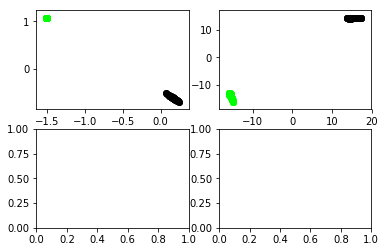

In [37]:
fig, axs = plt.subplots(2,2)


color = test_labels*255/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
    
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
    
plt.show()